In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv(r"./data/cerebro.txt",encoding = "utf-8",comment="#",sep="\s+")

In [8]:
df.head()

,gender,age-group,head-size,brain-weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
df.sample()

,gender,age-group,head-size,brain-weight
65,1,2,3329,1135


Text(0,0.5,'Brain Weight')

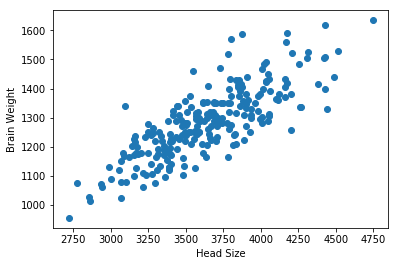

In [10]:
plt.scatter(df['head-size'],df['brain-weight'])
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [11]:
y = df['brain-weight'].values
y.shape

(237,)

In [14]:
x = df['head-size'].values
x = x[:,np.newaxis]
x.shape

(237, 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=123)

In [20]:
x.shape

(237, 1)

In [21]:
x_train.shape

(165, 1)

In [23]:
x_test.shape

(72, 1)

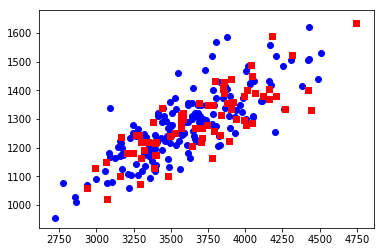

In [25]:
plt.scatter(x_train,y_train,color='blue',marker='o')
plt.scatter(x_test,y_test,color='red',marker='s')

In [26]:
from sklearn.linear_model import LinearRegression

# Entrenamiento (Fit)

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lr.coef_

array([0.271117])

In [29]:
y_pred = lr.predict(x_test)

In [31]:
y_pred[0]

1363.724504352412

In [32]:
x_test[0]

array([3916], dtype=int64)

In [33]:
y_test[0]

1360

# Evaluacion

In [34]:
lr.score(x_test,y_test)

0.6348613740710773

In [38]:
sum_cuadrados = ((y_test-y_pred)**2).sum()
sum_cuadrados

364911.4894181157

In [40]:
res = ((y_test-y_test.mean())**2).sum()
res

999377.9444444445

In [41]:
r2 = 1 - sum_cuadrados/res
r2

0.6348613740710773

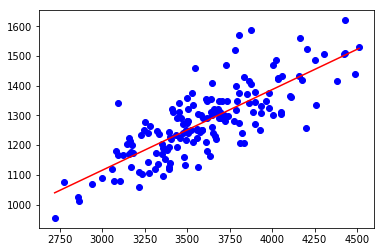

In [43]:
min_pred = x_train.min() * lr.coef_ + lr.intercept_
max_pred = x_train.max() * lr.coef_ + lr.intercept_

plt.scatter(x_train,y_train,color='blue',marker='o')
plt.plot([x_train.min(),x_train.max()],[min_pred,max_pred],color='red')